<a href="https://colab.research.google.com/github/eduardadelavle/Machine-Learning/blob/main/CNN_Classificacao_deepLearning_d%C3%ADgito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bibliotecas

In [31]:
import tensorflow 
from tensorflow import keras
from keras.models import model_from_json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [32]:
#!pip install -q pyyaml h5py

Importando o dataset e separando entre treinamento e teste

In [33]:
dataset= keras.datasets.mnist.load_data(path="mnist.npz")
((imagens_treino, classes_treino), (imagens_teste, classes_teste))=dataset


Informações sobre o dataset

imagens de Treino: 60000
imagens de Treino: (60000, 28, 28)
imagens de Teste: (10000, 28, 28)
Classes de Treino: (60000,)
Min:  0
Max:  9


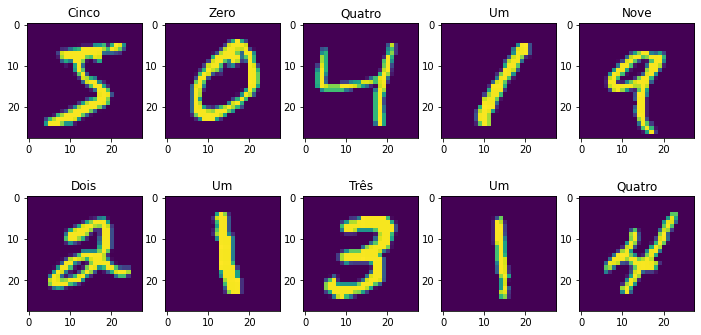

In [34]:
print("imagens de Treino:", len(imagens_treino))
print("imagens de Treino:", imagens_treino.shape)
print("imagens de Teste:", imagens_teste.shape)
print("Classes de Treino:", classes_treino.shape)

print("Min: ", classes_treino.min())
print("Max: ", classes_treino.max())

nomes_de_classificacoes = ['Zero', 'Um', 'Dois', 'Três', 'Quatro', 'Cinco', 'Seis', 'Sete', 'Oito', 'Nove']

total_de_classificacoes=10

fig, axes = plt.subplots(figsize=(10,5))
fig.tight_layout()

for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[classes_treino[imagem]])

Uma única imagem

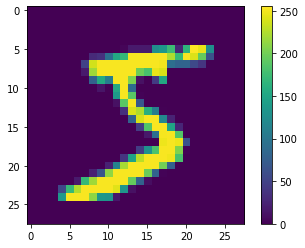

In [35]:
plt.imshow(imagens_treino[0])
plt.colorbar()

In [36]:
print(imagens_treino.shape)
imagens_treino = imagens_treino.reshape((imagens_treino.shape[0],28,28, 1))
imagens_teste = imagens_teste.reshape((imagens_teste.shape[0],28,28, 1))
print(imagens_treino.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [37]:
#normalização (otimização dos dados antes do treino)
#testar ativar e desativar a normalização
imagens_treino = imagens_treino/255

#modelo = keras.Sequential([
  # entrada
  # processamento
  # saída
# ])
# Classe Sequential fornece recursos de treinamento e inferência no nosso modelo.

modelo = keras.Sequential([keras.layers.Conv2D(32, (3,3), input_shape=(28,28, 1), activation=tensorflow.nn.relu),
keras.layers.MaxPooling2D((2,2)),
keras.layers.Flatten(),
keras.layers.Dense(100, activation=tensorflow.nn.relu),
keras.layers.Dropout(0.2),
#testar com mais uma--> keras.layers.Dense(128, activation=tensorflow.nn.relu),
keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])
adam=keras.optimizers.Adam(lr=0.5)
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

Treinamento

In [24]:
#validation_split=0.2
hist=modelo.fit(imagens_treino, classes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.2107 - accuracy: 0.9374 - val_loss: 0.0807 - val_accuracy: 0.9774
Epoch 2/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0750 - accuracy: 0.9770 - val_loss: 0.0597 - val_accuracy: 0.9833
Epoch 3/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0515 - accuracy: 0.9839 - val_loss: 0.0548 - val_accuracy: 0.9837
Epoch 4/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0399 - accuracy: 0.9879 - val_loss: 0.0557 - val_accuracy: 0.9839
Epoch 5/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0304 - accuracy: 0.9901 - val_loss: 0.0518 - val_accuracy: 0.9864
Epoch 6/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0235 - accuracy: 0.9921 - val_loss: 0.0510 - val_accuracy: 0.9862
Epoch 7/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0197 - accuracy: 0.9935 - val_loss: 0.0535 -

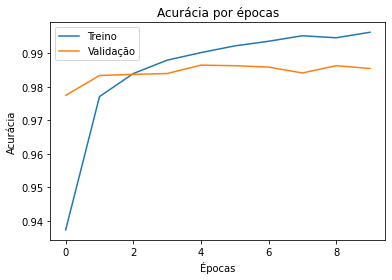

In [25]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

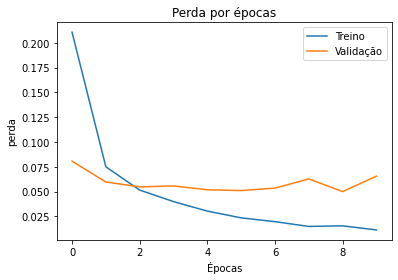

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('perda')
plt.legend(['Treino', 'Validação'])

In [27]:
# serialize model to JSON
model_json = modelo.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelo.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


Testes

In [28]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
testes=loaded_model.predict(imagens_teste/255)
testes

Loaded model from disk


array([[1.96649963e-09, 7.87787474e-11, 2.02880199e-10, ...,
        9.99999642e-01, 1.98593031e-09, 6.22892671e-08],
       [4.60716798e-09, 1.77629117e-05, 9.99982238e-01, ...,
        1.11896254e-14, 1.08436090e-12, 1.74395935e-14],
       [9.66592584e-10, 1.00000000e+00, 8.24104153e-12, ...,
        1.91699439e-08, 7.12966741e-10, 6.71121936e-10],
       ...,
       [4.39590413e-18, 9.07260031e-12, 4.17345475e-17, ...,
        2.40415110e-12, 1.41458845e-10, 1.15794144e-07],
       [4.43659172e-11, 3.41030394e-16, 1.17300996e-20, ...,
        9.60348422e-15, 1.23702321e-05, 1.28809142e-11],
       [2.29345243e-13, 2.74237272e-15, 1.76234583e-13, ...,
        1.58864682e-16, 1.03833642e-09, 7.44711632e-17]], dtype=float32)

In [29]:
perda_teste, acuracia_teste=loaded_model.evaluate(imagens_teste, classes_teste)
print('Perda do teste', perda_teste)
print('Acurácia do teste', acuracia_teste*100)

313/313 [==============================] - 2s 7ms/step - loss: 95.0623 - accuracy: 0.9243
Perda do teste 95.06233215332031
Acurácia do teste 92.43000149726868


In [30]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________